In [1]:
from inferential_analysis import InferentialAnalysis
import pandas as pd #needed for data reading & wrangling
import numpy as np #needed for data reading & wrangling

## Example: Interactive Machine Translation [Kreutzer et al. 2020]

### Training Reproducibility: Statistical Significance Testing of Best Baseline vs Best Competitor under Seed Variation

In [ ]:
eval_data = pd.read_csv('evaluation_data/kreutzer.csv')
eval_data = eval_data.astype({"sentence_id" : 'category', "system" : 'category'})
#bin source sentence length
eval_data = eval_data.assign(src_length_class = lambda x: pd.cut(x.src_length, bins=[np.min(x.src_length), 15, 55, np.max(x.src_length)], labels=["short", "typical", "very long"], include_lowest=True))

In [ ]:
kreutzer = InferentialAnalysis(evaluation_data = eval_data, eval_metric_col = "ter", system_col = "system", input_identifier_col = "sentence_id")

In [4]:
kreutzer.system_comparison()

Fitting H0-model.
Fitting H1-model.
P-values adjusted by tukey method for family of 3 estimates
GLRT p-value <= alpha: Null hypothesis can be rejected! At least two systems are different. See contrasts for pairwise comparisons.


In [5]:
kreutzer.SystemComparison.glrt

{'chi_square': 34.08951047763003, 'df': 2, 'p': 3.958738858944599e-08}

In [6]:
kreutzer.SystemComparison.means

,system,Estimate,95CI_lo,95CI_up,SE
0,Baseline,0.591,0.575,0.607,0.008
1,Marking,0.578,0.563,0.594,0.008
2,PostEdit,0.581,0.566,0.597,0.008


In [7]:
kreutzer.SystemComparison.contrasts

,Contrast,Estimate,95CI_lo,95CI_up,SE,P-val,Effect_size_g
0,Baseline - Marking,0.012,0.007,0.017,0.002,0.000,0.203235
1,Baseline - PostEdit,0.010,0.005,0.015,0.002,0.000,0.169362
2,Marking - PostEdit,-0.003,-0.006,0.001,0.001,0.163,-0.050809


#### Investigate If The Observed Performance Difference Depends on the **input length** of the Input Sentence

In [8]:
kreutzer.conditional_system_comparison(data_prop_col = "src_length_class")

Data property is a categorical variable. Applying cell means model and reporting means.
Fitting H0-model.
Fitting H1-model.
P-values adjusted by tukey method for family of 3 estimates
GLRT p-value <= alpha: Null hypothesis can be rejected! At least two systems depend differently to the data property. See contrasts for pairwise comparisons.


In [9]:
kreutzer.ConditionalSystemComparison.glrt

{'chi_square': 32.43479533648133, 'df': 4, 'p': 1.558982328231373e-06}

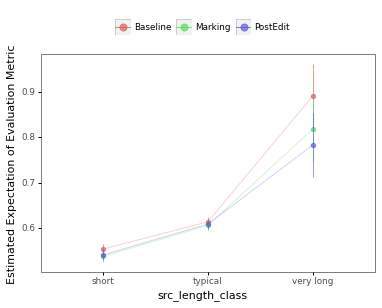

<ggplot: (8793001129247)>

In [10]:
kreutzer.ConditionalSystemComparison.interaction_plot

In [12]:
kreutzer.ConditionalSystemComparison.means

,system,src_length_class,Estimate,95CI_lo,95CI_up,SE
0,Baseline,short,0.554,0.531,0.577,0.012
1,Marking,short,0.538,0.515,0.561,0.012
2,PostEdit,short,0.541,0.519,0.564,0.012
3,Baseline,typical,0.614,0.593,0.635,0.011
4,Marking,typical,0.606,0.585,0.627,0.011
5,PostEdit,typical,0.609,0.588,0.630,0.011
6,Baseline,very long,0.891,0.752,1.031,0.071
7,Marking,very long,0.818,0.681,0.955,0.070
8,PostEdit,very long,0.783,0.646,0.921,0.070


In [13]:
kreutzer.ConditionalSystemComparison.contrasts

,Contrast,src_length_class,Estimate,95CI_lo,95CI_up,SE,P-val,Effect_size_g
0,Baseline - Marking,short,0.016,0.009,0.024,0.003,0.000,0.271684
1,Baseline - PostEdit,short,0.013,0.005,0.020,0.003,0.000,0.220743
2,Marking - PostEdit,short,-0.003,-0.009,0.002,0.002,0.268,-0.050941
3,Baseline - Marking,typical,0.008,0.001,0.015,0.003,0.018,0.135842
4,Baseline - PostEdit,typical,0.005,-0.002,0.012,0.003,0.210,0.084901
5,Marking - PostEdit,typical,-0.003,-0.008,0.002,0.002,0.305,-0.050941
6,Baseline - Marking,very long,0.073,0.029,0.117,0.019,0.000,1.239558
7,Baseline - PostEdit,very long,0.108,0.063,0.152,0.019,0.000,1.833866
8,Marking - PostEdit,very long,0.035,0.003,0.066,0.013,0.025,0.594308


In [14]:
kreutzer.ConditionalSystemComparison.data_property

'src_length_class'

In [15]:
kreutzer.icc(algorithm_id = "Marking", facet_cols = ["replication"])

Calculating variance decomposition.


In [16]:
kreutzer.Reliability.icc

,Var,ICC
sentence_id,0.065892,98.363463
replication,0.000001,0.001797
Residual,0.001095,1.634740


#### Inferential Analysis: Reliability

In [2]:
eval_data = pd.read_csv('evaluation_data/kreutzer_reliability-marking.csv')
eval_data = eval_data.astype({"sentence_id" : 'category', "system" : 'category'})
#bin source sentence length
eval_data = eval_data.assign(src_length_class = lambda x: pd.cut(x.src_length, bins=[np.min(x.src_length), 15, 55, np.max(x.src_length)], labels=["short", "typical", "very long"], include_lowest=True))

In [3]:
kreutzer = InferentialAnalysis(evaluation_data = eval_data, eval_metric_col = "ter", system_col = "system", input_identifier_col = "sentence_id")

In [4]:
kreutzer.icc(algorithm_id = "Marking", facet_cols = ["decoder_dropout", "decoder_dropout_hidden", "encoder_dropout", "learning_rate", "seed"])

Calculating variance decomposition.


In [5]:
kreutzer.Reliability.icc

,Var,ICC
sentence_id,5.744993e-02,88.378145
decoder_dropout,3.023409e-05,0.046511
decoder_dropout_hidden,1.300297e-06,0.002000
encoder_dropout,2.245424e-05,0.034542
learning_rate,1.266809e-04,0.194880
seed,5.792373e-07,0.000891
Residual,7.373501e-03,11.343031


#### Investigate If the Choice of Learning Rate has a Significant Impact on the System Performance

In [6]:
kreutzer.hyperparameter_assessment(algorithm_id = "Marking", hyperparameter_col = "learning_rate")

Fitting H0-model.
Fitting H1-model.
P-values adjusted by tukey method for family of 6 estimates
GLRT p-value <= alpha: Null hypothesis can be rejected! At least two systems are different. See contrasts for pairwise comparisons.


In [7]:
kreutzer.HyperParameterAssessment.glrt

{'chi_square': 20374.080926772207, 'df': 3, 'p': 0.0}

In [8]:
kreutzer.HyperParameterAssessment.means

,learning_rate,Estimate,95CI_lo,95CI_up,SE
0,0.0001,0.581,0.567,0.596,0.007
1,0.0003,0.584,0.570,0.599,0.007
2,0.0005,0.589,0.574,0.604,0.007
3,0.001,0.606,0.592,0.621,0.007


In [9]:
kreutzer.HyperParameterAssessment.contrasts

,Contrast,Estimate,95CI_lo,95CI_up,SE,P-val,Effect_size_g
0,learning_rate0.0001 - learning_rate0.0003,-0.003,-0.004,-0.003,0.0,0.0,-0.034840
1,learning_rate0.0001 - learning_rate0.0005,-0.008,-0.008,-0.007,0.0,0.0,-0.092908
2,learning_rate0.0001 - learning_rate0.001,-0.025,-0.026,-0.025,0.0,0.0,-0.290337
3,learning_rate0.0003 - learning_rate0.0005,-0.005,-0.005,-0.004,0.0,0.0,-0.058067
4,learning_rate0.0003 - learning_rate0.001,-0.022,-0.023,-0.022,0.0,0.0,-0.255496
5,learning_rate0.0005 - learning_rate0.001,-0.017,-0.018,-0.017,0.0,0.0,-0.197429


In [10]:
kreutzer.HyperParameterAssessment.algorithm

'Marking'

#### Assess If the Observed Hyper-Parameter Influence is Moderated by the **input length** of the Input Sentence

In [11]:
kreutzer.conditional_hyperparameter_assessment(algorithm_id = "Marking", hyperparameter_col = "learning_rate", data_prop_col = "src_length_class")

Data property is a categorical variable. Applying cell means model and reporting means.
Fitting H0-model.
Fitting H1-model.
P-values adjusted by tukey method for family of 6 estimates
GLRT p-value <= alpha: Null hypothesis can be rejected! At least two systems depend differently to the data property. See contrasts for pairwise comparisons.


In [12]:
kreutzer.ConditionalHyperParameterAssessment.glrt

{'chi_square': 2898.4041851609945, 'df': 6, 'p': 0.0}

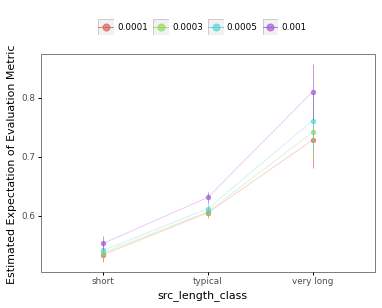

<ggplot: (8736565902460)>

In [13]:
kreutzer.ConditionalHyperParameterAssessment.interaction_plot

In [170]:
kreutzer.ConditionalHyperParameterAssessment.means

,learning_rate,src_length_class,Estimate,95CI_lo,95CI_up,SE
0,0.0001,short,0.534,0.510,0.557,0.012
1,0.0003,short,0.537,0.513,0.560,0.012
2,0.0005,short,0.541,0.517,0.564,0.012
3,0.001,short,0.553,0.530,0.577,0.012
4,0.0001,typical,0.605,0.586,0.623,0.009
5,0.0003,typical,0.607,0.589,0.625,0.009
6,0.0005,typical,0.612,0.593,0.630,0.009
7,0.001,typical,0.631,0.613,0.649,0.009
8,0.0001,very long,0.728,0.636,0.820,0.047
9,0.0003,very long,0.741,0.649,0.834,0.047


In [15]:
kreutzer.ConditionalHyperParameterAssessment.contrasts

,Contrast,src_length_class,Estimate,95CI_lo,95CI_up,SE,P-val,Effect_size_g
0,learning_rate0.0001 - learning_rate0.0003,short,-0.003,-0.004,-0.003,0.000,0.0,-0.034872
1,learning_rate0.0001 - learning_rate0.0005,short,-0.007,-0.008,-0.007,0.000,0.0,-0.081368
2,learning_rate0.0001 - learning_rate0.001,short,-0.020,-0.021,-0.019,0.000,0.0,-0.232480
3,learning_rate0.0003 - learning_rate0.0005,short,-0.004,-0.005,-0.003,0.000,0.0,-0.046496
4,learning_rate0.0003 - learning_rate0.001,short,-0.016,-0.017,-0.016,0.000,0.0,-0.185984
5,learning_rate0.0005 - learning_rate0.001,short,-0.012,-0.013,-0.012,0.000,0.0,-0.139488
6,learning_rate0.0001 - learning_rate0.0003,typical,-0.002,-0.003,-0.002,0.000,0.0,-0.023248
7,learning_rate0.0001 - learning_rate0.0005,typical,-0.007,-0.008,-0.006,0.000,0.0,-0.081368
8,learning_rate0.0001 - learning_rate0.001,typical,-0.026,-0.027,-0.026,0.000,0.0,-0.302224
9,learning_rate0.0003 - learning_rate0.0005,typical,-0.005,-0.005,-0.004,0.000,0.0,-0.058120


In [16]:
kreutzer.ConditionalHyperParameterAssessment.algorithm

'Marking'

In [17]:
kreutzer.ConditionalHyperParameterAssessment.data_property

'src_length_class'